In [1]:
### Importing python packages to use through Data Science Exercies
# For cleaning and peparing data
import pandas as pd 
import numpy as np
import sklearn.metrics as metrics
import matplotlib as mpl

# For use when encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# For Centering and Scaling data sets
from sklearn.preprocessing import StandardScaler

# For Feature Engineering and Principle Component Aanalysis
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
import sklearn.feature_selection
from sklearn.decomposition import PCA

# For Modeling KNN Classification
from sklearn import neighbors, metrics

# For Modeling Logistic Regression 
from sklearn.linear_model import LogisticRegression

# For Modeling Random Forest
from sklearn.ensemble import RandomForestClassifier

# For Modeling Neural Networks
from sklearn.neural_network import MLPClassifier

# For Modeling Support Vector Machine
from sklearn.svm import SVC

# For Visualizations and data plots
import matplotlib.pyplot as plt

# For Model explanation statistics, Confusion Matrix & AUROC Curve
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

# Aunaltics Data Scientist Exercise I Prediction
### Nolan Stoffer
### October 14, 2021

## Part 1 - Data Loading and Preparation
#### Data Loading
In this section the data files are loaded into Jupyter Notebook. Column names are assigned according to the data structure breakdown provided with this exercise. Data is combined for more efficient cleaning for the training and testing files.

In [2]:
    # Loading testing and training data csv files for use in exercise
train = pd.read_csv("au_train.csv")
test = pd.read_csv("au_test.csv")  
    
    # Assigning column headers according to data breakdown for testing and training data sets
dftrain = pd.DataFrame(data = train)
dftrain.columns = ['age', 'workclass','fnlwgt', 'education','education-num','marital-status', 'occupation', 'relationship', 'race',
'sex','capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'annualclass']
#print(dftrain.columns)

dftest = pd.DataFrame(data= test)
dftest.columns = ['age', 'workclass','fnlwgt', 'education','education-num','marital-status', 'occupation', 'relationship', 'race',
'sex','capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'annualclass']
#print(dftest.columns)

In [3]:
dftrain.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annualclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Data Cleaning
Cell values are cleaned to remove excess spaces. In looking through the data I noticed the categories in the "annualclass" variable are not consistent between the training and test data. The training categories are "<=50K" and ">50K", where the testing categories are "<=50K." and ">50K."
As part of cleaning I removed the extra period.

In [4]:
# Cleaning data to eliminate leading and trailing spaces
# clearing out period on the annualclass column in testing dataset
fulldata = pd.concat([dftrain, dftest],ignore_index=True)

fulldata['workclass'] = fulldata['workclass'].str.strip()
fulldata['education'] = fulldata['education'].str.strip()
fulldata['marital-status'] = fulldata['marital-status'].str.strip()
fulldata['occupation'] = fulldata['occupation'].str.strip()
fulldata['relationship'] = fulldata['relationship'].str.strip()
fulldata['race'] = fulldata['race'].str.strip()
fulldata['sex'] = fulldata['sex'].str.strip()
fulldata['native-country'] = fulldata['native-country'].str.strip()
fulldata['annualclass'] = fulldata['annualclass'].str.strip()
fulldata['annualclass'] = fulldata['annualclass'].str.strip(".")

#print(fulldata['workclass'].unique())
#print(fulldata['education'].unique())
#print(fulldata['marital-status'].unique())
#print(fulldata['occupation'].unique())
#print(fulldata['relationship'].unique())
#print(fulldata['race'].unique())
#print(fulldata['sex'].unique())
#print(fulldata['native-country'].unique())
#print(fulldata['annualclass'].unique())

enctrain = fulldata.iloc[0:32561,:]
enctest = fulldata.iloc[32561:48841,:]

In [5]:
#Identifying unique categoreis within each variable for testing and training sets
print("Testing Data Unique Categories")
for var_name in enctest.columns:
    if enctest[var_name].dtypes == 'object':
        unique_var = len(enctest[var_name].unique())
        print("Feature '{var_name}' has {unique_var} unique categories".format(var_name=var_name, unique_var=unique_var))
        
print("\nTraining Data Unique Categories")
for var_name in enctrain.columns:
    if enctrain[var_name].dtypes == 'object':
        unique_var = len(enctrain[var_name].unique())
        print("Feature '{var_name}' has {unique_var} unique categories".format(var_name=var_name, unique_var=unique_var))

Testing Data Unique Categories
Feature 'workclass' has 9 unique categories
Feature 'education' has 16 unique categories
Feature 'marital-status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'native-country' has 41 unique categories
Feature 'annualclass' has 2 unique categories

Training Data Unique Categories
Feature 'workclass' has 9 unique categories
Feature 'education' has 16 unique categories
Feature 'marital-status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'native-country' has 42 unique categories
Feature 'annualclass' has 2 unique categories


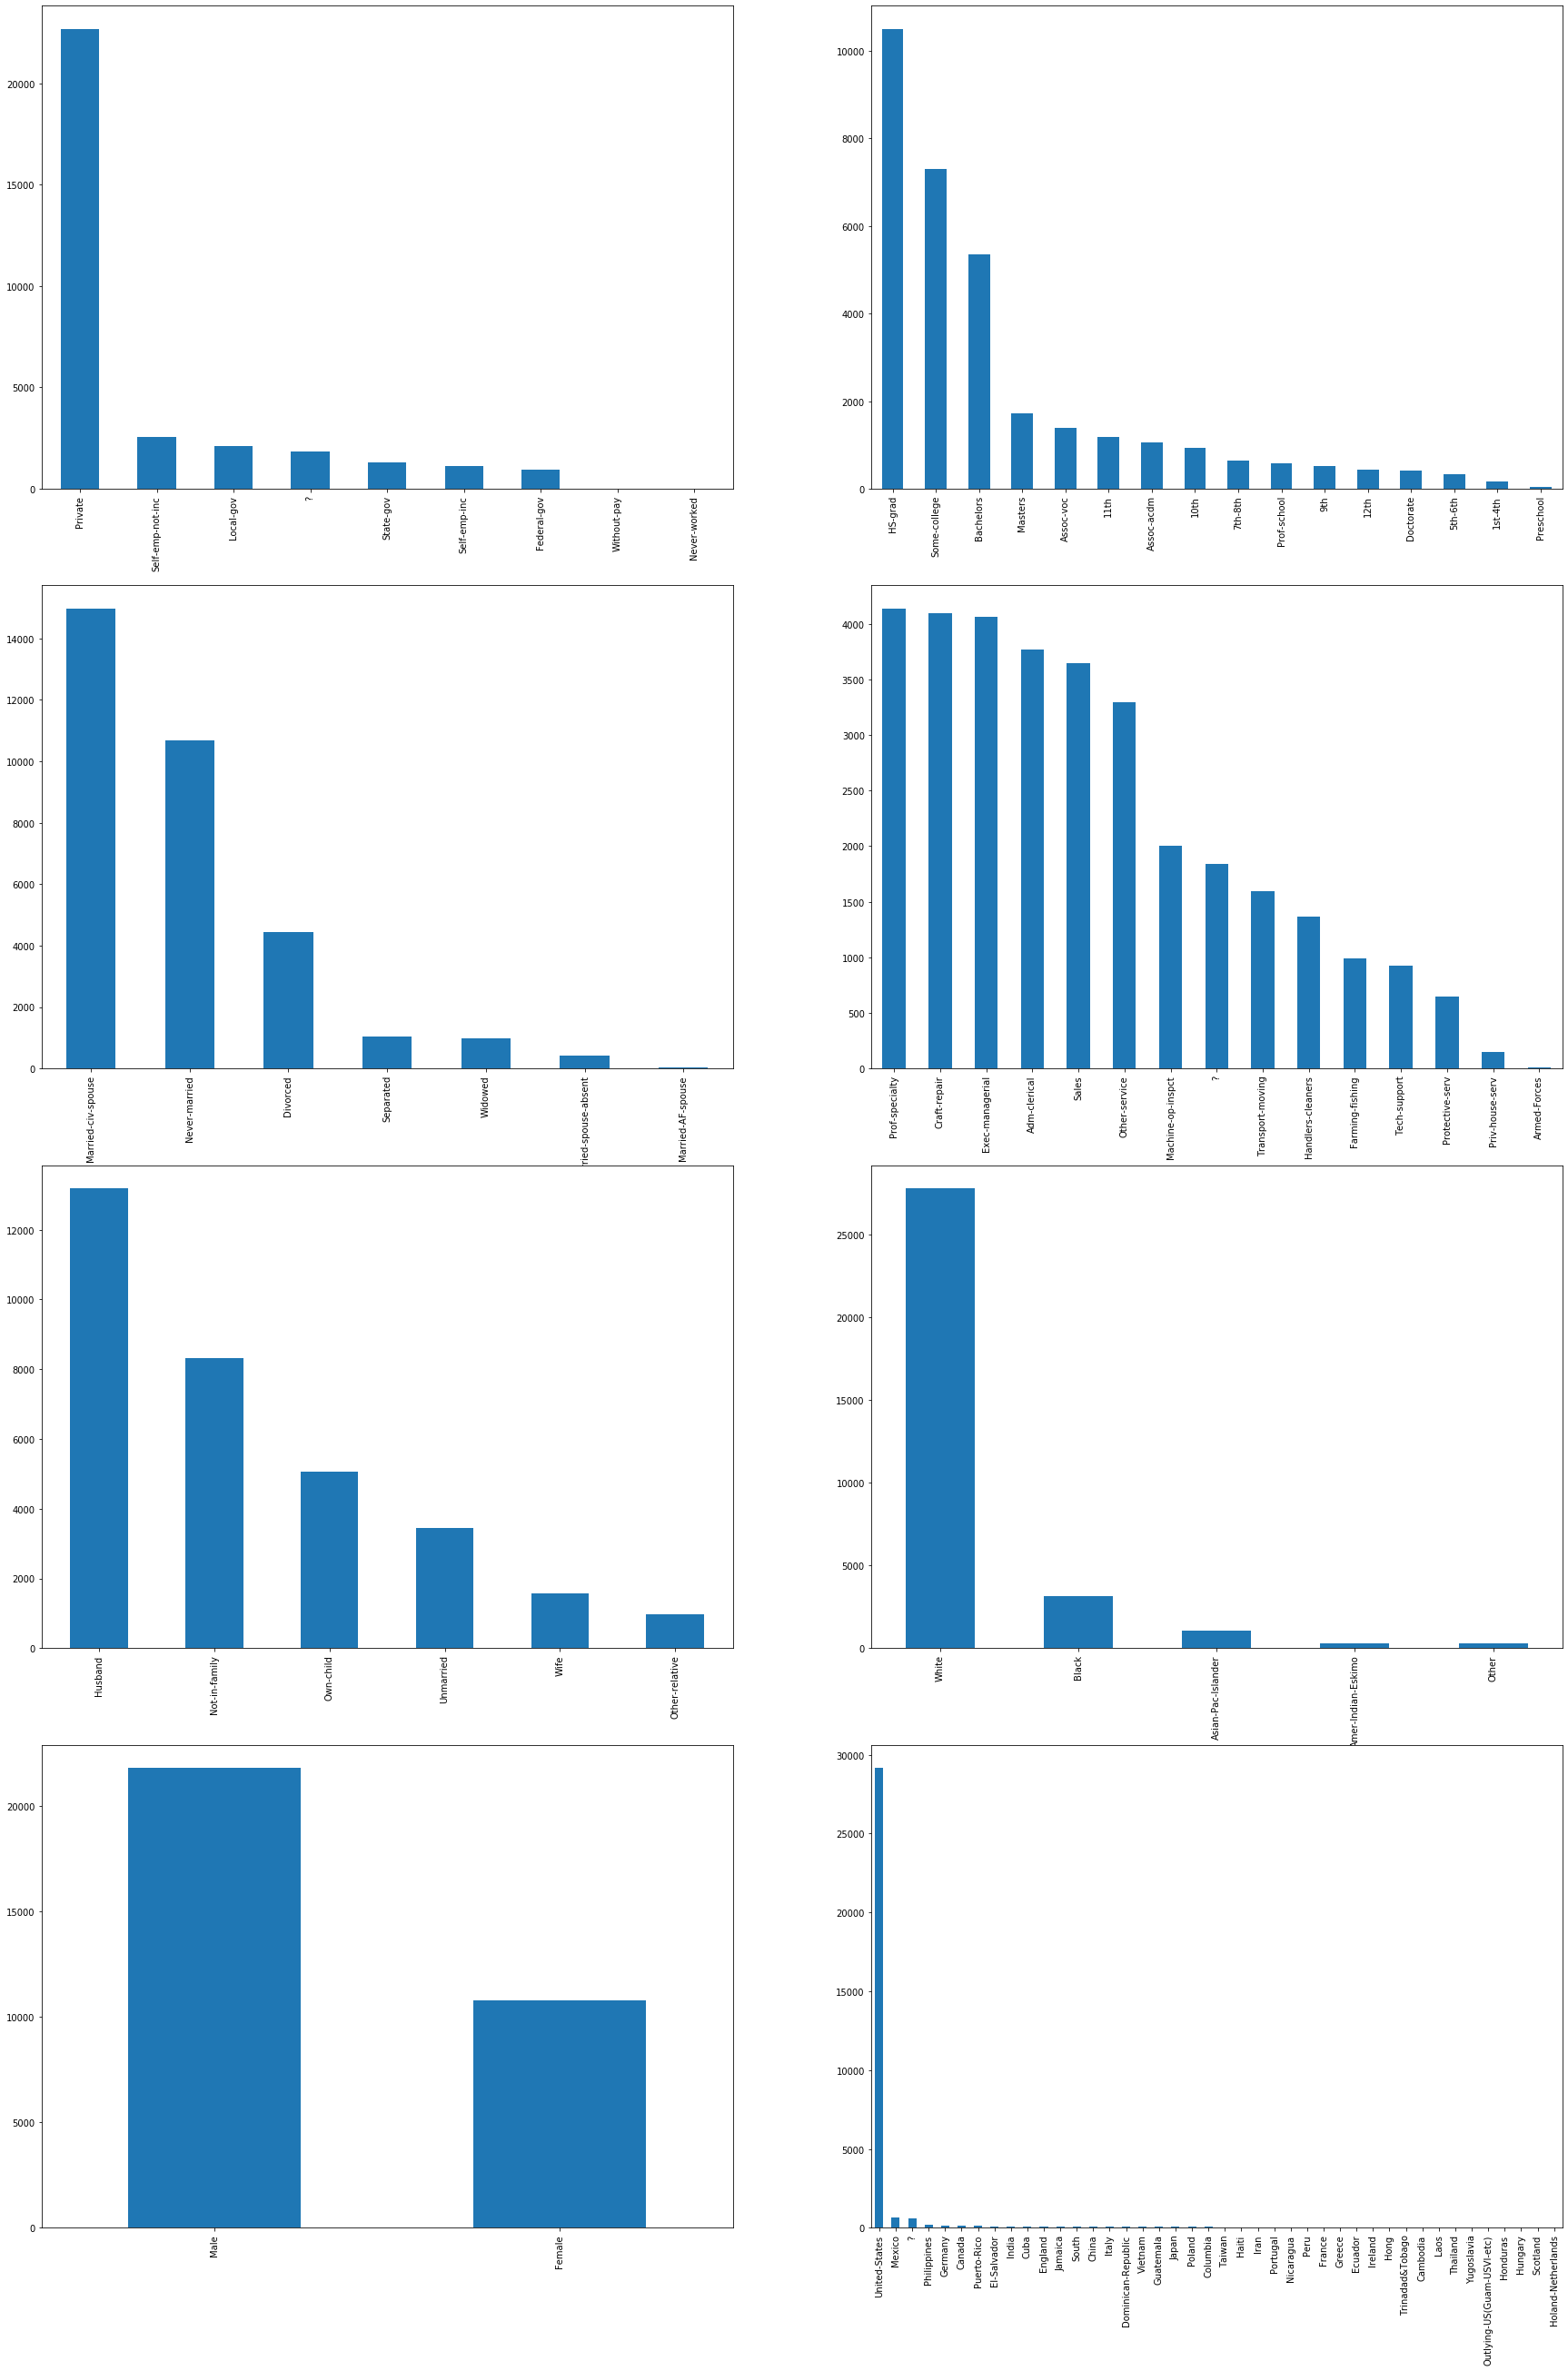

In [6]:
# Plotting distribution of variable categories in training data
fig = plt.figure()
fig.set_figheight(45)
fig.set_figwidth(30)
ax1 = fig.add_subplot(4,2,1)
ax1 = enctrain["workclass"].value_counts().plot(kind='bar')
ax2 = fig.add_subplot(4,2,2)
ax2 = enctrain["education"].value_counts().plot(kind='bar')
ax3 = fig.add_subplot(4,2,3)
ax3 = enctrain["marital-status"].value_counts().plot(kind='bar')
ax4 = fig.add_subplot(4,2,4)
ax4 = enctrain["occupation"].value_counts().plot(kind='bar')
ax5 = fig.add_subplot(4,2,5)
ax5 = enctrain["relationship"].value_counts().plot(kind='bar')
ax6 = fig.add_subplot(4,2,6)
ax6 = enctrain["race"].value_counts().plot(kind='bar')
ax7 = fig.add_subplot(4,2,7)
ax7 = enctrain["sex"].value_counts().plot(kind='bar')
ax8 = fig.add_subplot(4,2,8)
ax8 = enctrain["native-country"].value_counts().plot(kind='bar')
plt.show()

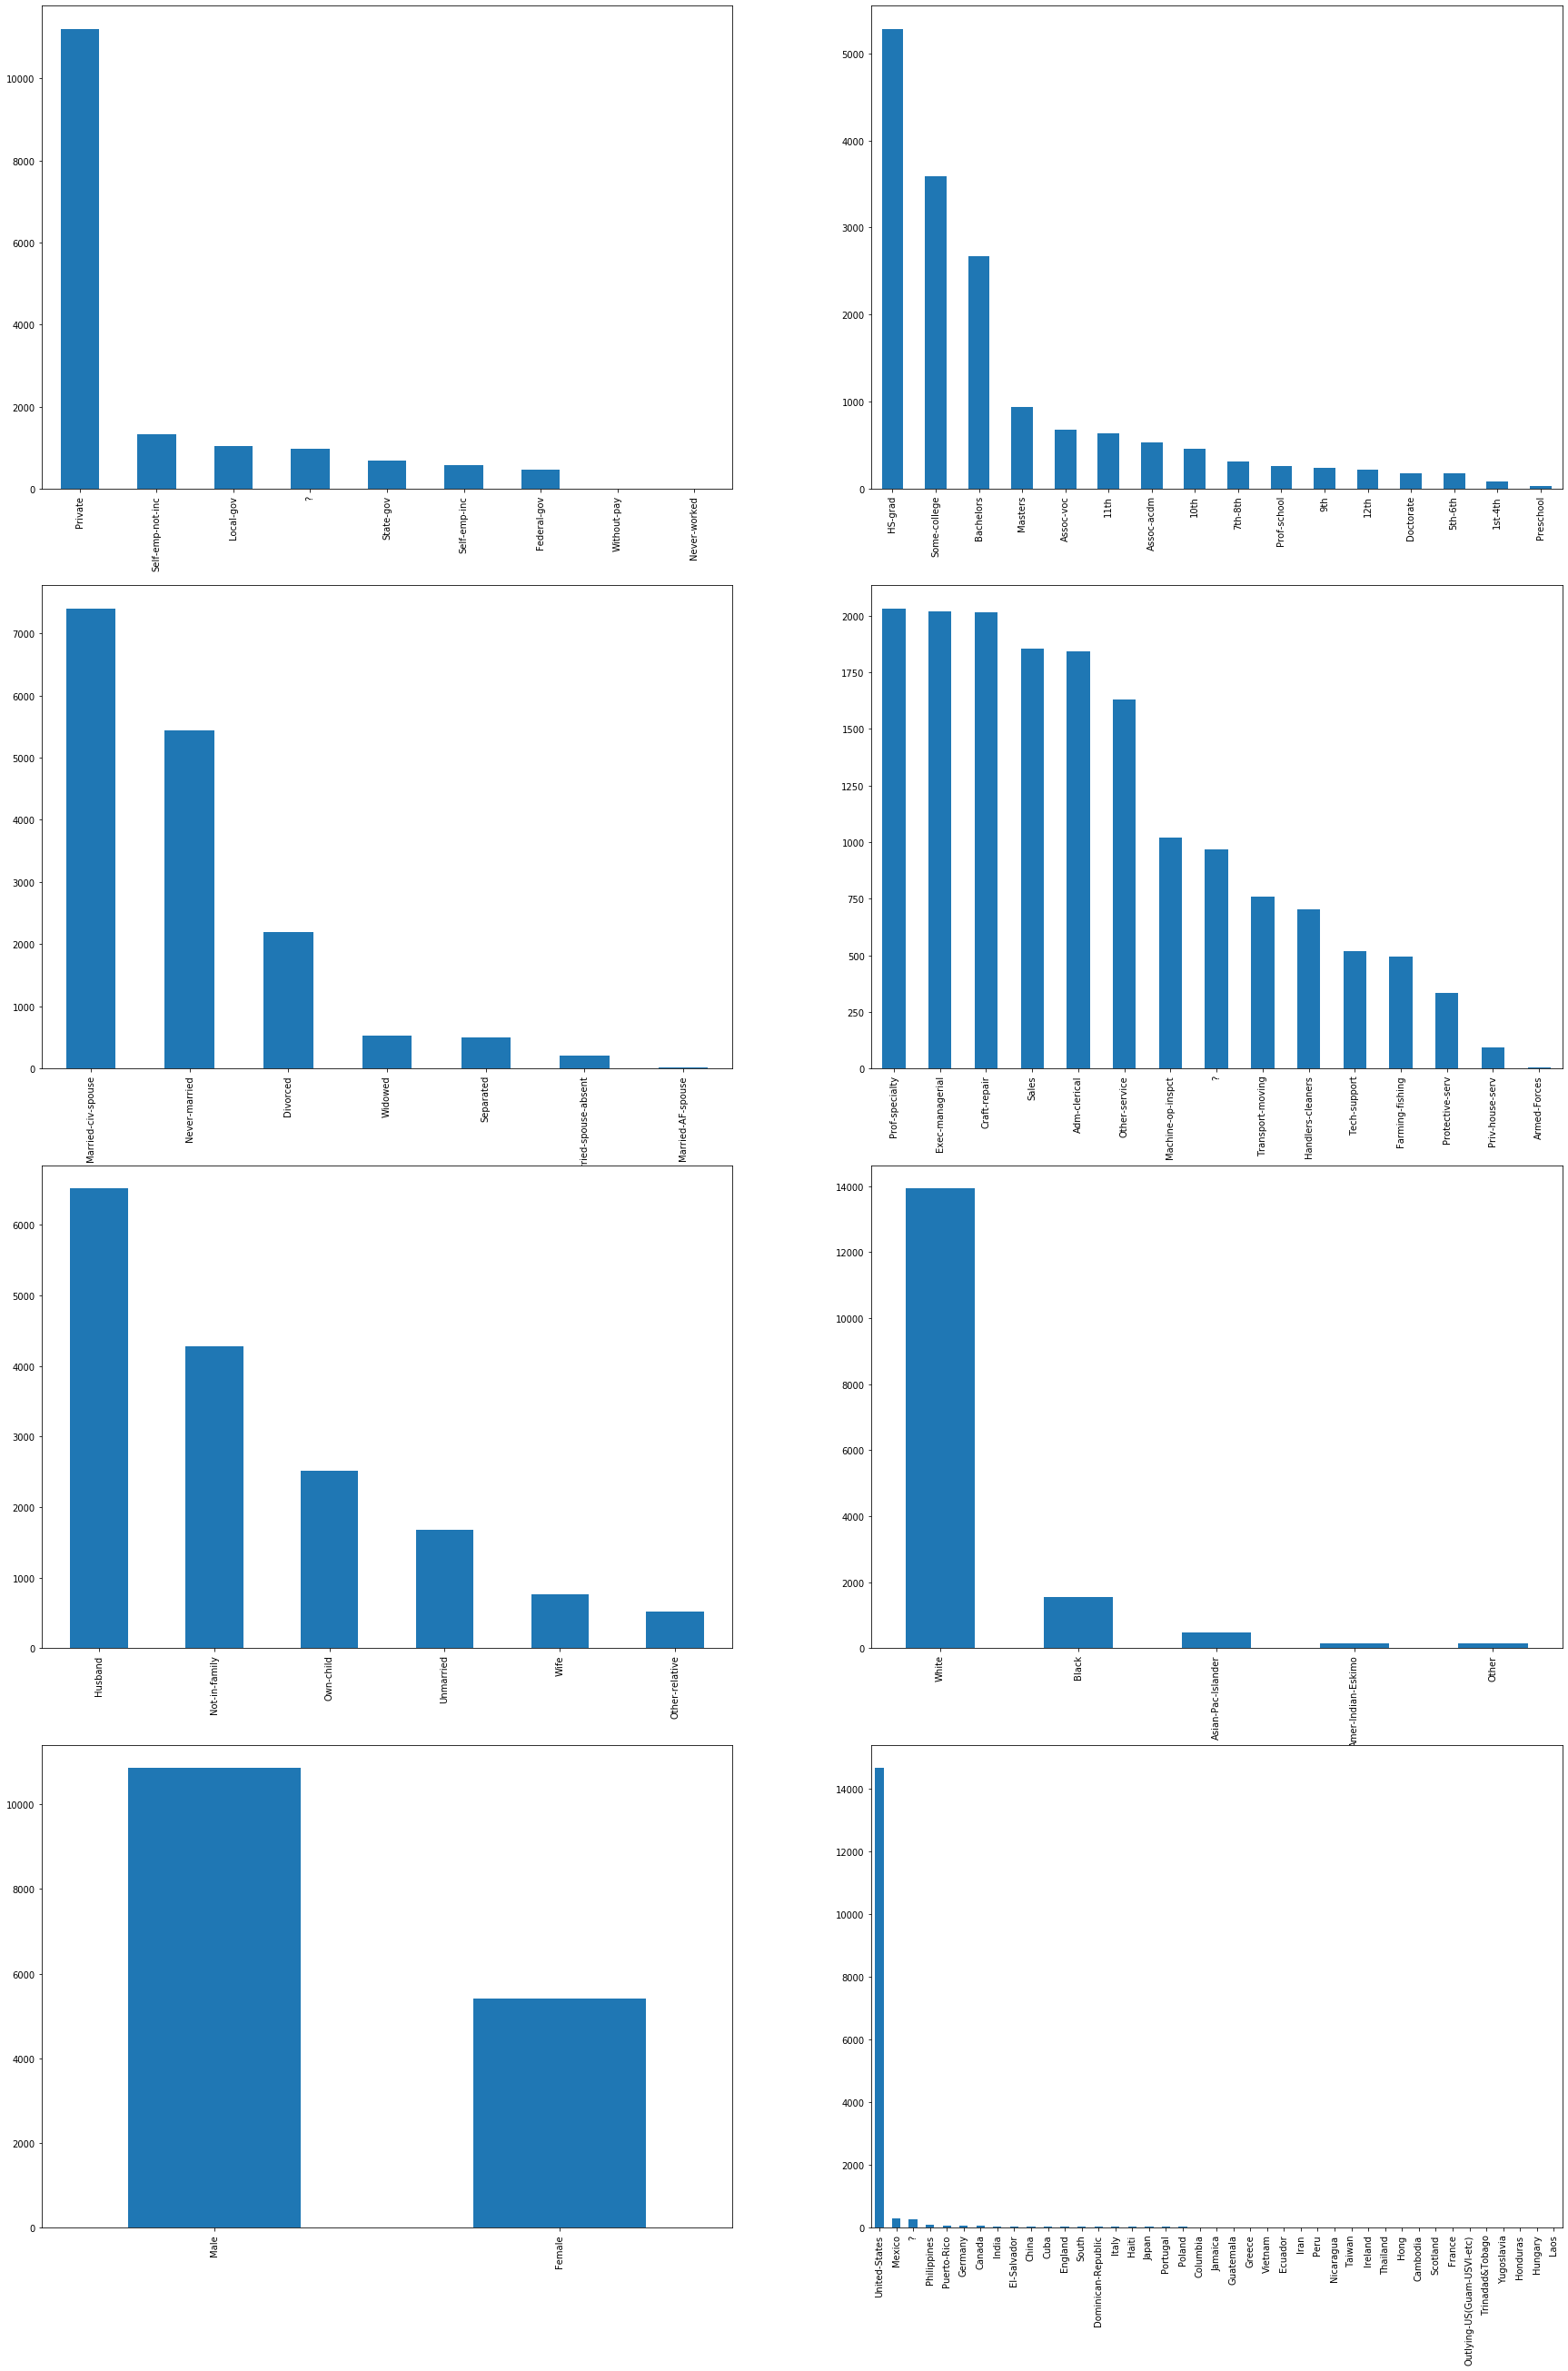

In [7]:
# Plotting distribution of variable categories in training data
fig = plt.figure()
fig.set_figheight(45)
fig.set_figwidth(30)
ax1 = fig.add_subplot(4,2,1)
ax1 = enctest["workclass"].value_counts().plot(kind='bar')
ax2 = fig.add_subplot(4,2,2)
ax2 = enctest["education"].value_counts().plot(kind='bar')
ax3 = fig.add_subplot(4,2,3)
ax3 = enctest["marital-status"].value_counts().plot(kind='bar')
ax4 = fig.add_subplot(4,2,4)
ax4 = enctest["occupation"].value_counts().plot(kind='bar')
ax5 = fig.add_subplot(4,2,5)
ax5 = enctest["relationship"].value_counts().plot(kind='bar')
ax6 = fig.add_subplot(4,2,6)
ax6 = enctest["race"].value_counts().plot(kind='bar')
ax7 = fig.add_subplot(4,2,7)
ax7 = enctest["sex"].value_counts().plot(kind='bar')
ax8 = fig.add_subplot(4,2,8)
ax8 = enctest["native-country"].value_counts().plot(kind='bar')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

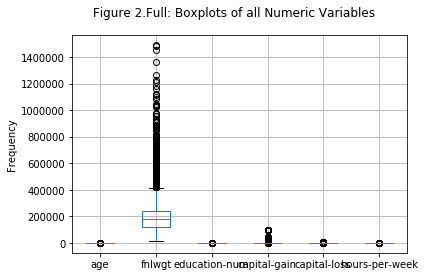

In [8]:
# Boxplot for full data set after Centering and Scaling
fulldata.boxplot(column =['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week'])
plt.suptitle("Figure 2.Full: Boxplots of all Numeric Variables")
plt.title("")
plt.ylabel
plt.ylabel("Frequency")
plt.show

#### Continuous Data Distributions
Turning to the continuous data, Using histograms and boxplots I examined the distributions. Capital gain and loss variables were mostly 0s with the occastional different value. Age is positively skewed, but otherwise looks normal. Education num is bimodal. Fnlwgt is positively skewed. Hours-per-week looks normal.

#### Splitting, Centering, & Scaling
After data cleaning to model the data I split the full data set back into the testing and training sets provided. I centered and scaled the continuous variables for use in the models for both the testing and training sets.

In [9]:
# Splitting dependent and independent variables
encX_test = enctest.iloc[:,0:14]
encY_test = enctest.iloc[:,14]
encX_train = enctrain.iloc[:,0:14]
encY_train = enctrain.iloc[:,14]

encX_trainC = encX_train[['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week']]
encX_testC = encX_test[['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week']]

scalertest = StandardScaler()
scalertest.fit(encX_testC,y=None)
encX_test = scalertest.transform(encX_testC)

encX_test = pd.DataFrame(data = encX_test)
encX_test.columns = ['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [10]:
encX_test.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,-0.994118,0.353459,-1.196805,-0.142666,-0.218069,-0.031337
1,-0.055432,-0.942366,-0.417819,-0.142666,-0.218069,0.770049
2,-0.777498,1.395403,0.750658,-0.142666,-0.218069,-0.031337
3,0.377807,-0.275393,-0.028327,0.871056,-0.218069,-0.031337
4,-1.499564,-0.812933,-0.028327,-0.142666,-0.218069,-0.832722


In [11]:
scalertrain = StandardScaler()
scalertrain.fit(encX_trainC,y=None)
encX_train = scalertrain.transform(encX_trainC)

encX_train = pd.DataFrame(data = encX_train)
encX_train.columns = ['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [12]:
encX_train.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [13]:
stan_scaled_XC = pd.concat([encX_train, encX_test],ignore_index=True)

#### Data Encoding
Categorical variables are examined to determine how they are broken down. Categorical or string variables can not be used in statistical models, so each is encoded to an integer, this allows for the model to function while maintaining data integrity.

In [14]:
# Creating a copy of the data
encdata = fulldata.select_dtypes(include=['object']).copy()
encdata.head()

# Creating encoder for string variable columns for statistical use
lb_make = LabelEncoder()
encdata['workclass_code'] = lb_make.fit_transform(encdata['workclass'])
encdata['education_code'] = lb_make.fit_transform(encdata["education"])
encdata['marital-status_code'] = lb_make.fit_transform(encdata["marital-status"])
encdata['occupation_code'] = lb_make.fit_transform(encdata["occupation"])
encdata['relationship_code'] = lb_make.fit_transform(encdata["relationship"])
encdata['race_code'] = lb_make.fit_transform(encdata["race"])
encdata['sex_code'] = lb_make.fit_transform(encdata["sex"])
encdata['native-country_code'] = lb_make.fit_transform(encdata["native-country"])
encdata['annualclass_code'] = lb_make.fit_transform(encdata["annualclass"])

# Encoding categorical variables to integer values for model use
fullencdata = pd.DataFrame(fulldata)
fullencdata.columns = ['age', 'workclass','fnlwgt', 'education','education-num','marital-status', 'occupation', 'relationship', 'race',
'sex','capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'annualclass']
fullencdata['workclass'] = encdata['workclass_code']
fullencdata['education'] = encdata['education_code']
fullencdata['marital-status'] = encdata['marital-status_code']
fullencdata['occupation'] = encdata['occupation_code']
fullencdata['relationship'] = encdata['relationship_code']
fullencdata['race'] = encdata['race_code']
fullencdata['sex'] = encdata["sex_code"]
fullencdata['native-country'] = encdata['native-country_code']
fullencdata['annualclass'] = encdata['annualclass_code']

<function matplotlib.pyplot.show(*args, **kw)>

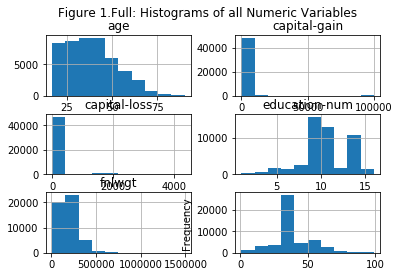

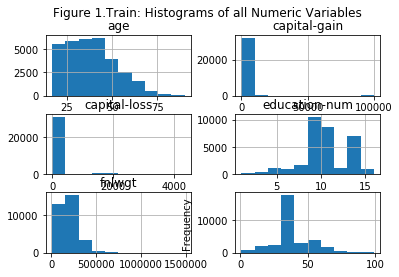

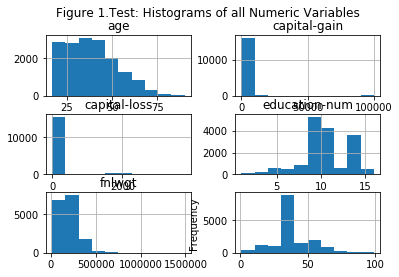

In [15]:
#Histogram for full data set
fullencdata.hist(column =['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week'])
plt.suptitle("Figure 1.Full: Histograms of all Numeric Variables")
plt.title("")
plt.ylabel("Frequency")
plt.show

#Histogram for training data set
enctrain.hist(column =['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week'])
plt.suptitle("Figure 1.Train: Histograms of all Numeric Variables")
plt.title("")
plt.ylabel("Frequency")
plt.show

#Histogram for testing data set
enctest.hist(column =['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week'])
plt.suptitle("Figure 1.Test: Histograms of all Numeric Variables")
plt.title("")
plt.ylabel("Frequency")
plt.show

In [16]:
# Replacing original continuous variables with centered and scaled values
fullencdata['age'] = stan_scaled_XC['age']
fullencdata['fnlwgt'] = stan_scaled_XC['fnlwgt']
fullencdata['education-num'] = stan_scaled_XC['education-num']
fullencdata['capital-gain'] = stan_scaled_XC['capital-gain']
fullencdata['capital-loss'] = stan_scaled_XC['capital-loss']
fullencdata['hours-per-week'] = stan_scaled_XC['hours-per-week']

fullencdata.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annualclass
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,0
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,0
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,0
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,0


In [17]:
# Splitting the fully encoded and standardized data set back into testing and training sets
enctrain = fullencdata.iloc[0:32561,:]
enctest = fullencdata.iloc[32561:48841,:]

In [18]:
enctest.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annualclass
32561,-0.994118,4,0.353459,1,-1.196805,4,7,3,2,1,-0.142666,-0.218069,-0.031337,39,0
32562,-0.055432,4,-0.942366,11,-0.417819,2,5,0,4,1,-0.142666,-0.218069,0.770049,39,0
32563,-0.777498,2,1.395403,7,0.750658,2,11,0,4,1,-0.142666,-0.218069,-0.031337,39,1
32564,0.377807,4,-0.275393,15,-0.028327,2,7,0,2,1,0.871056,-0.218069,-0.031337,39,1
32565,-1.499564,0,-0.812933,15,-0.028327,4,0,3,4,0,-0.142666,-0.218069,-0.832722,39,0


In [19]:
enctrain.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annualclass
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,0
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,0
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,0
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,0


#### Outliers
All continuous variables in the data set have noticeable outliers these were identified through the box plot below and by the IQR Tukey test, but the fnlwgt and Capital Gain varialbes are most noteable. Most of the values in Capital gain are 0, with very few exceptions. Fnlwgt is full of outliers however I'm assuming this feature is somehow related to financial weight or possibly assetts related to each record, therefore outlier removal would harm data integrity.

<function matplotlib.pyplot.show(*args, **kw)>

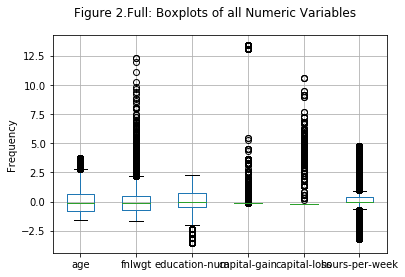

In [20]:
# Boxplot for full data set after
fullencdata.boxplot(column =['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week'])
plt.suptitle("Figure 2.Full: Boxplots of all Numeric Variables")
plt.title("")
plt.ylabel
plt.ylabel("Frequency")
plt.show

In [21]:
#IQR Function to detect outliers in the data
def tukey_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [22]:
#Checking for outliers in continuous data
tukey_indices, tukey_values = tukey_outliers(enctrain['age'])
#print(np.sort(tukey_values))

tukey_indices, tukey_values = tukey_outliers(enctrain['fnlwgt'])
#print(np.sort(tukey_values))

tukey_indices, tukey_values = tukey_outliers(enctrain['education-num'])
#print(np.sort(tukey_values))

tukey_indices, tukey_values = tukey_outliers(enctrain['capital-gain'])
#print(np.sort(tukey_values))

tukey_indices, tukey_values = tukey_outliers(enctrain['capital-gain'])
#print(np.sort(tukey_values))

tukey_indices, tukey_values = tukey_outliers(enctrain['hours-per-week'])
#print(np.sort(tukey_values))


tukey_indices, tukey_values = tukey_outliers(enctest['age'])
#print(np.sort(tukey_values))

tukey_indices, tukey_values = tukey_outliers(enctest['fnlwgt'])
#print(np.sort(tukey_values))

tukey_indices, tukey_values = tukey_outliers(enctest['education-num'])
#print(np.sort(tukey_values))

tukey_indices, tukey_values = tukey_outliers(enctest['capital-gain'])
#print(np.sort(tukey_values))

tukey_indices, tukey_values = tukey_outliers(enctest['capital-gain'])
#print(np.sort(tukey_values))

tukey_indices, tukey_values = tukey_outliers(enctest['hours-per-week'])
#print(np.sort(tukey_values))


#### Missing Data?
There is no missing data in any column for either the Testing or the Training data sets. 

In [23]:
#Checking training data for missing values
enctrain.isnull().sum().sort_values(ascending=False)

annualclass       0
native-country    0
hours-per-week    0
capital-loss      0
capital-gain      0
sex               0
race              0
relationship      0
occupation        0
marital-status    0
education-num     0
education         0
fnlwgt            0
workclass         0
age               0
dtype: int64

In [24]:
#Checking testing data for missing values
enctest.isnull().sum().sort_values(ascending=False)

annualclass       0
native-country    0
hours-per-week    0
capital-loss      0
capital-gain      0
sex               0
race              0
relationship      0
occupation        0
marital-status    0
education-num     0
education         0
fnlwgt            0
workclass         0
age               0
dtype: int64

## Part 2 - Feature Engineering
Finding interactions between base data variables in order to draw futher insights and improve the model. Principal component analysis helps to identify which of these interactions has the greatest impact on the model.

In [25]:
#Function to establish interactions between data variables

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

In [26]:
encX_test = enctest.iloc[:,0:14]
encY_test = enctest.iloc[:,14]
encX_train = enctrain.iloc[:,0:14]
encY_train = enctrain.iloc[:,14]

In [27]:
# Adding interactions found above
intertrain = add_interactions(encX_train)
intertest = add_interactions(encX_test)

In [28]:
# Principle Component Analysis
pca = PCA(n_components=10)
train_pca = pd.DataFrame(pca.fit_transform(intertrain))
test_pca = pd.DataFrame(pca.fit_transform(intertest))
print(train_pca.head(5))
print(test_pca.head())

            0           1          2           3          4          5  \
0  148.615922 -117.569556  21.598533 -170.064594  -5.539101  38.702471   
1   70.978265  -35.112022 -42.315887 -102.363970  12.808172 -16.599597   
2  -22.140259  -38.628197 -69.890947    2.914280  67.199672 -25.631457   
3  244.771812  257.743050 -34.987831  -49.818947  -8.203175  -2.721308   
4  374.777534  141.385412 -51.936069  125.297863  21.380419  94.959004   

           6          7          8          9  
0  23.512683  19.176786 -47.344627   2.092240  
1  -7.632665  -6.710245 -55.072423  71.404049  
2 -25.531504 -26.659025  17.021836  -6.466853  
3 -17.673833 -17.459834  -2.403964  31.284529  
4 -15.930256  17.448389 -21.821786  14.256179  
            0           1           2           3          4          5  \
0  209.781599  277.232944  113.762223  -36.554826   1.567968  24.432913   
1    4.279258  -65.981008  -59.777760  -32.324482 -15.967389 -24.313298   
2  -60.183376  201.705507  -32.838116   59

In [29]:
# Selecting features for the model
select = sklearn.feature_selection.SelectKBest(k=35)
selected_feat = select.fit(intertrain, encY_train)
ind_selected = selected_feat.get_support(indices=True)
colnames_selected = [intertest.columns[i] for i in ind_selected]

audataX_train_sel = intertrain[colnames_selected]
audataX_test_sel = intertest[colnames_selected]

print(colnames_selected)
audataX_train_sel.head(5)

['age', 'education-num', 'relationship', 'sex', 'capital-gain', 'hours-per-week', 'age_workclass', 'age_education', 'age_occupation', 'age_race', 'age_sex', 'age_native-country', 'workclass_education-num', 'workclass_relationship', 'education_education-num', 'education_relationship', 'education_sex', 'education_capital-gain', 'education_hours-per-week', 'education-num_marital-status', 'education-num_occupation', 'education-num_race', 'education-num_sex', 'education-num_native-country', 'marital-status_relationship', 'marital-status_capital-gain', 'relationship_race', 'relationship_native-country', 'race_sex', 'race_capital-gain', 'race_hours-per-week', 'sex_hours-per-week', 'capital-gain_capital-loss', 'capital-gain_native-country', 'hours-per-week_native-country']


,age,education-num,relationship,sex,capital-gain,hours-per-week,age_workclass,age_education,age_occupation,age_race,...,marital-status_capital-gain,relationship_race,relationship_native-country,race_sex,race_capital-gain,race_hours-per-week,sex_hours-per-week,capital-gain_capital-loss,capital-gain_native-country,hours-per-week_native-country
0,0.030671,1.134739,1.0,1.0,0.148453,-0.035429,0.214694,0.276035,0.030671,0.122682,...,0.593812,4.0,39.0,4.0,0.593812,-0.141718,-0.035429,-0.032164,5.789663,-1.381748
1,0.837109,1.134739,0.0,1.0,-0.145920,-2.222153,5.022654,7.533981,3.348436,3.348436,...,-0.291841,0.0,0.0,4.0,-0.583682,-8.888612,-2.222153,0.031615,-5.690899,-86.663972
2,-0.042642,-0.420060,1.0,1.0,-0.145920,-0.035429,-0.170568,-0.469062,-0.255852,-0.170568,...,-0.000000,4.0,39.0,4.0,-0.583682,-0.141718,-0.035429,0.031615,-5.690899,-1.381748
3,1.057047,-1.197459,0.0,1.0,-0.145920,-0.035429,4.228187,1.057047,6.342280,2.114093,...,-0.291841,0.0,0.0,2.0,-0.291841,-0.070859,-0.035429,0.031615,-5.690899,-1.381748
4,-0.775768,1.134739,5.0,0.0,-0.145920,-0.035429,-3.103071,-6.981911,-7.757679,-1.551536,...,-0.291841,10.0,25.0,0.0,-0.291841,-0.070859,-0.000000,0.031615,-0.729602,-0.177147


## Part 3 - Modeling
Now that the data has been processed and desired features have been selected the data can be fit to a model.

Modeling techniques used:
 - KNN Classification
 - Logistic regression
 - Support Vector Machine
 - Neural Networks
 - Random Forest
 
For performance explanation:
 - Accuracy*
 - Sensitivity
 - Specificity
 - Precision
 - Negative Predictive Value
 - F1 Score*
 - AUROC Curve*
 - Confusion Matrix*

In [30]:
# Function for Accuracy
def accuracy(tp, fp, fn, tn):
    acc = (tp+tn)/(tp+fp+fn+tn)
    return (acc)
# Function for Recall also known as Sensitivity, thus using sens as the variable name
def recall(tp, fp, fn, tn):
    sens = tp/(tp+fn)
    return (sens)
# Function for Specificity
def specificity(tp, fp, fn, tn):
    spec = tn/(tn+fp)
    return (spec)
# Function for Precision
def precision(tp, fp, fn, tn):
    prec = tp/(tp+fp)
    return (prec)
# Function for Negative Predictive Value
def NegPredVal(tp, fp, fn, tn):
    npv = tn/(tn+fn)
    return (npv)
# Function for F1_Score or the harmonic average of precision and sensitivity
def f1_score(tp, fp, fn, tn):
    p=precision(tp,fp,fn,tn)
    r=recall(tp,fp,fn,tn)
    f1s = (2*p*r/(p+r))
    return (f1s)

#### KNN For Loop
The following code iterates through a KNN classification model between 3 and 15 neighbors. Each iteration provides an AUROC curve, a Confusion Matrix and model explanation statistics (Accuracy, Sensitivity, Precision, Negative Predictive Value, F1 Score)


K =  3 



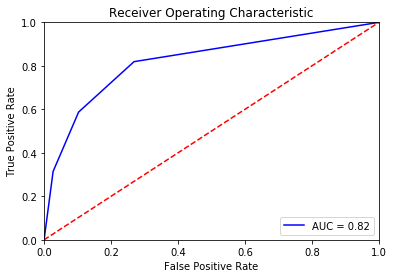

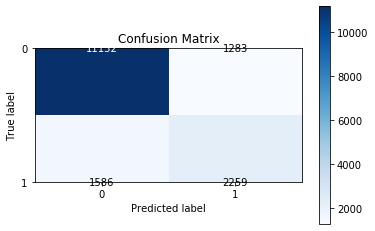

Accuracy (acc):  [0.8237715 0.8237715]
Sensitivity (sens/recall):  [0.89682348 0.58751625]
Specificity (spec):  [0.58751625 0.89682348]
Precision (prec):  [0.87549066 0.63777527]
Negative Predictive Value (npv):  [0.63777527 0.87549066]
F1-Score (F1): [0.88602868 0.611615  ]
AUROC Score:  0.8202439943885056

K =  4 



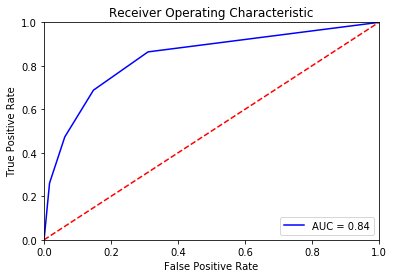

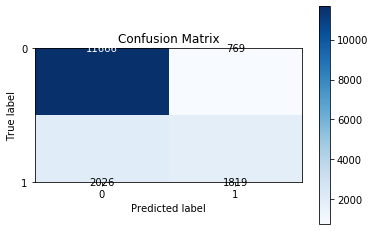

Accuracy (acc):  [0.82831695 0.82831695]
Sensitivity (sens/recall):  [0.93815842 0.47308192]
Specificity (spec):  [0.47308192 0.93815842]
Precision (prec):  [0.85203038 0.70285935]
Negative Predictive Value (npv):  [0.70285935 0.85203038]
F1-Score (F1): [0.89302254 0.56552153]
AUROC Score:  0.8377807721085927

K =  5 



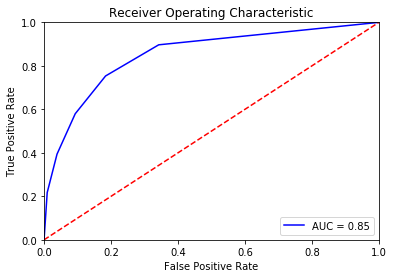

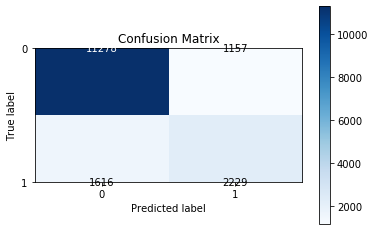

Accuracy (acc):  [0.8296683 0.8296683]
Sensitivity (sens/recall):  [0.90695617 0.57971391]
Specificity (spec):  [0.57971391 0.90695617]
Precision (prec):  [0.87467039 0.65829888]
Negative Predictive Value (npv):  [0.65829888 0.87467039]
F1-Score (F1): [0.89052075 0.61651224]
AUROC Score:  0.8514752342872142

K =  6 



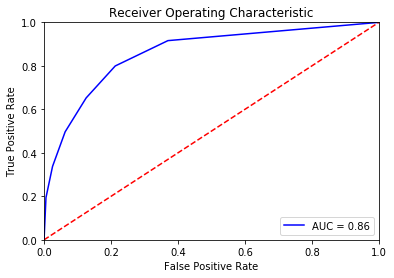

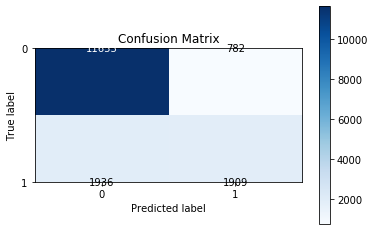

Accuracy (acc):  [0.83304668 0.83304668]
Sensitivity (sens/recall):  [0.93711299 0.49648895]
Specificity (spec):  [0.49648895 0.93711299]
Precision (prec):  [0.85753183 0.70940171]
Negative Predictive Value (npv):  [0.70940171 0.85753183]
F1-Score (F1): [0.89555795 0.58414933]
AUROC Score:  0.8591852770949903

K =  7 



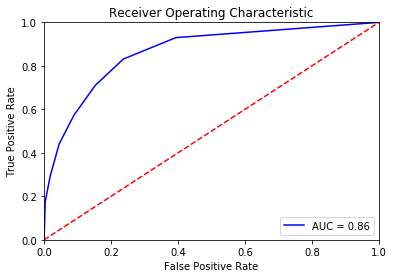

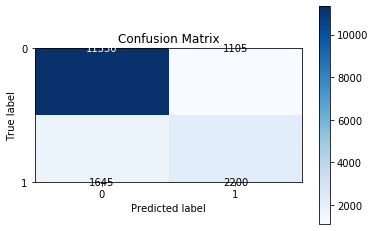

Accuracy (acc):  [0.83108108 0.83108108]
Sensitivity (sens/recall):  [0.91113792 0.57217165]
Specificity (spec):  [0.57217165 0.91113792]
Precision (prec):  [0.87321773 0.66565809]
Negative Predictive Value (npv):  [0.66565809 0.87321773]
F1-Score (F1): [0.89177489 0.61538462]
AUROC Score:  0.8646985024337217

K =  8 



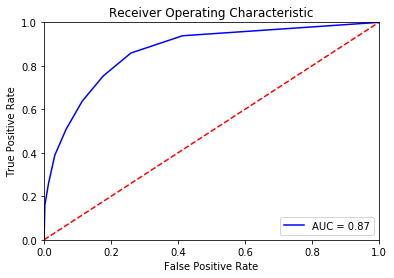

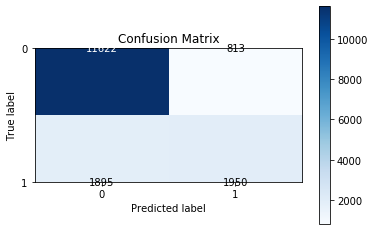

Accuracy (acc):  [0.83366093 0.83366093]
Sensitivity (sens/recall):  [0.93462002 0.50715215]
Specificity (spec):  [0.50715215 0.93462002]
Precision (prec):  [0.85980617 0.70575461]
Negative Predictive Value (npv):  [0.70575461 0.85980617]
F1-Score (F1): [0.89565351 0.5901937 ]
AUROC Score:  0.8685326402102375

K =  9 



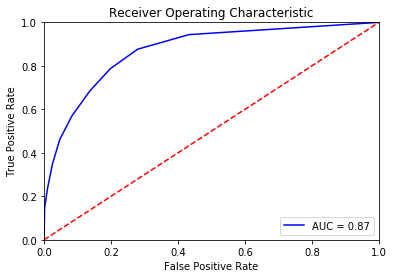

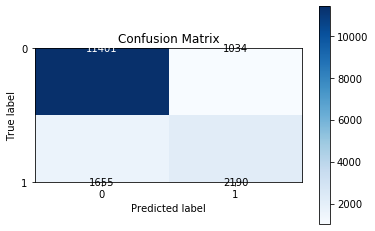

Accuracy (acc):  [0.83482801 0.83482801]
Sensitivity (sens/recall):  [0.91684761 0.56957087]
Specificity (spec):  [0.56957087 0.91684761]
Precision (prec):  [0.87323836 0.6792804 ]
Negative Predictive Value (npv):  [0.6792804  0.87323836]
F1-Score (F1): [0.89451179 0.61960673]
AUROC Score:  0.8708413320135968

K =  10 



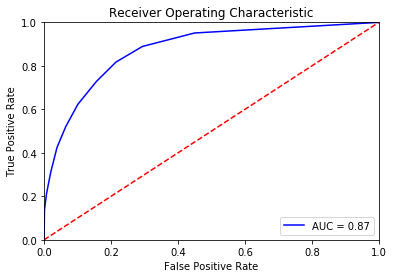

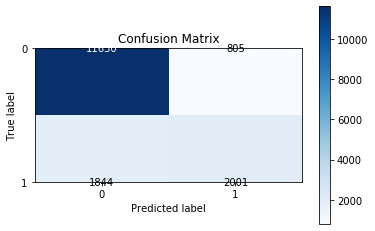

Accuracy (acc):  [0.83728501 0.83728501]
Sensitivity (sens/recall):  [0.93526337 0.52041612]
Specificity (spec):  [0.52041612 0.93526337]
Precision (prec):  [0.86314383 0.71311475]
Negative Predictive Value (npv):  [0.71311475 0.86314383]
F1-Score (F1): [0.89775754 0.60171403]
AUROC Score:  0.8747149677673709

K =  11 



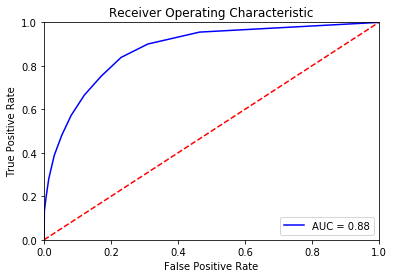

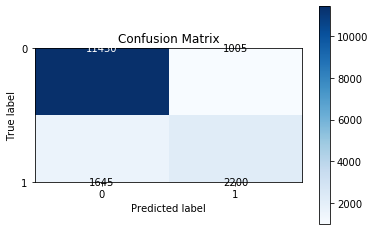

Accuracy (acc):  [0.83722359 0.83722359]
Sensitivity (sens/recall):  [0.91917973 0.57217165]
Specificity (spec):  [0.57217165 0.91917973]
Precision (prec):  [0.87418738 0.68642746]
Negative Predictive Value (npv):  [0.68642746 0.87418738]
F1-Score (F1): [0.89611917 0.62411348]
AUROC Score:  0.8765536054061092

K =  12 



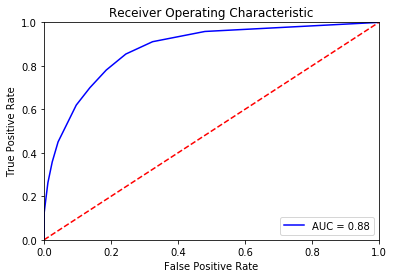

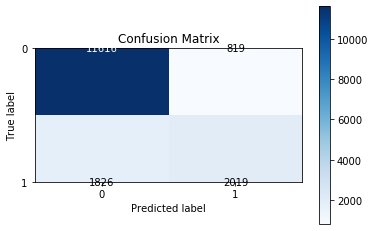

Accuracy (acc):  [0.83753071 0.83753071]
Sensitivity (sens/recall):  [0.93413752 0.52509753]
Specificity (spec):  [0.52509753 0.93413752]
Precision (prec):  [0.86415712 0.71141649]
Negative Predictive Value (npv):  [0.71141649 0.86415712]
F1-Score (F1): [0.89778568 0.60421966]
AUROC Score:  0.8784461514570174

K =  13 



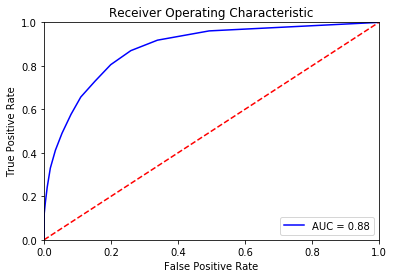

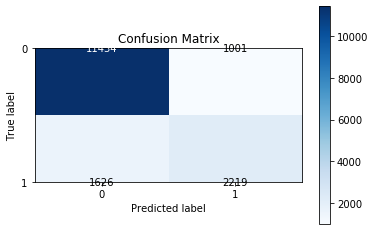

Accuracy (acc):  [0.83863636 0.83863636]
Sensitivity (sens/recall):  [0.91950141 0.57711313]
Specificity (spec):  [0.57711313 0.91950141]
Precision (prec):  [0.8754977  0.68913043]
Negative Predictive Value (npv):  [0.68913043 0.8754977 ]
F1-Score (F1): [0.89696019 0.62816702]
AUROC Score:  0.8800951737069171

K =  14 



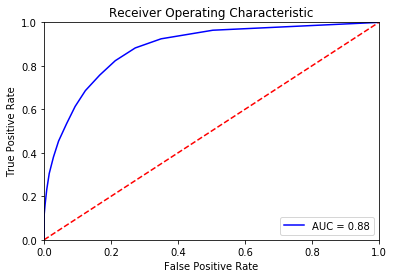

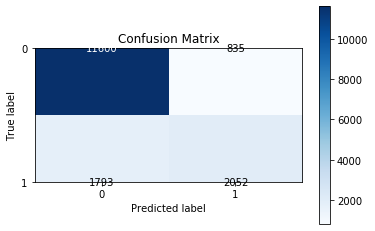

Accuracy (acc):  [0.83857494 0.83857494]
Sensitivity (sens/recall):  [0.93285082 0.5336801 ]
Specificity (spec):  [0.5336801  0.93285082]
Precision (prec):  [0.86612409 0.71077243]
Negative Predictive Value (npv):  [0.71077243 0.86612409]
F1-Score (F1): [0.89824996 0.60962567]
AUROC Score:  0.8815577282754589

K =  15 



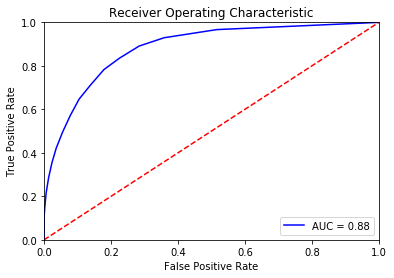

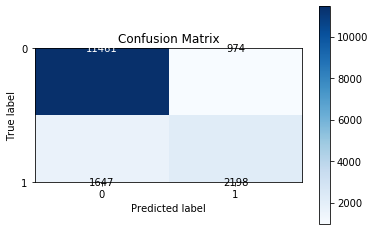

Accuracy (acc):  [0.83900491 0.83900491]
Sensitivity (sens/recall):  [0.9216727 0.5716515]
Specificity (spec):  [0.5716515 0.9216727]
Precision (prec):  [0.87435154 0.69293821]
Negative Predictive Value (npv):  [0.69293821 0.87435154]
F1-Score (F1): [0.89738872 0.62647855]
AUROC Score:  0.8824856013297757


In [31]:
# K Nearest Neighbor Classification Model
# Initializing for loop range
numneighb = range(3,16)
for i in numneighb:
    # Fitting the model to the data and establishing predictors
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(audataX_train_sel, encY_train)
    predict = knn.predict(audataX_test_sel)
    import sklearn.metrics as metrics
    # Calculating the fpr and tpr for all thresholds of the classification
    probs = knn.predict_proba(audataX_test_sel)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(encY_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    print( "\nK = ", knn.n_neighbors, "\n")
    # Plotting AUROC Curve
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    # Initializing Confusion Matrix
    Ck = np.empty([2,2])
    for colk in range(2):
        for rowk in range(2):
            Ck[rowk,colk] = np.sum(np.logical_and(predict==colk, encY_test==rowk))
    #Confusion matrix calculations for model explanation         
    fp = Ck.sum(axis=0) - np.diag(Ck)
    fn = Ck.sum(axis=1) - np.diag(Ck)
    tp = np.diag(Ck)
    tn = Ck.sum() - (fp + fn+ tp)
    
    # Plotting Confusion matrix
    skplt.metrics.plot_confusion_matrix(encY_test, predict)
    np.sum(np.logical_and(predict == colk, encY_test==rowk))
    plt.show()
    
    #Model Explanation variables
    print("Accuracy (acc): ", accuracy(tp,fn,fp,tn))
    print("Sensitivity (sens/recall): ", recall(tp,fp,fn,tn))
    print("Specificity (spec): ", specificity(tp,fp,fn,tn))
    print("Precision (prec): ", precision(tp,fp,fn,tn))
    print("Negative Predictive Value (npv): ", NegPredVal(tp,fp,fn,tn))
    print("F1-Score (F1):" ,f1_score(tp,fp,fn,tn))
    print("AUROC Score: ",roc_auc)
    
    

Support Vector Machine


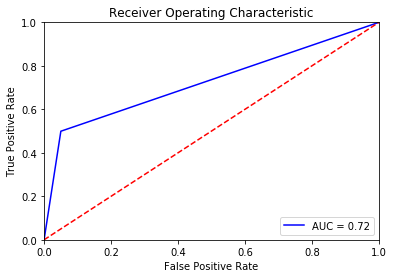

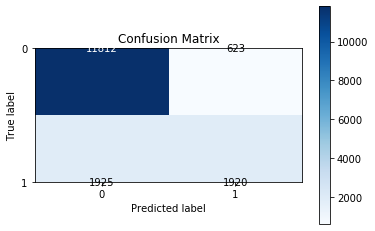

Accuracy (acc):  [0.84348894 0.84348894]
Sensitivity (sens/recall):  [0.94989948 0.4993498 ]
Specificity (spec):  [0.4993498  0.94989948]
Precision (prec):  [0.85986751 0.75501376]
Negative Predictive Value (npv):  [0.75501376 0.85986751]
F1-Score (F1): [0.90264405 0.60112711]
AUROC Score:  0.724624641111674


In [32]:
# Support Vector Machine Classification Model
svm = SVC(kernel = 'rbf', random_state = 4906,gamma='scale')
svm.fit(audataX_train_sel, encY_train)
#Predicting the Test Set
predict = svm.predict(audataX_test_sel)

#preds = y_pred[:,1]
fpr, tpr, threshold = metrics.roc_curve(encY_test, predict)
roc_auc = metrics.auc(fpr, tpr)

print("Support Vector Machine")
# Plotting AUROC Curve

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Initializing Confusion Matrix
Cs = np.empty([2,2])
for cols in range(2):
    for rows in range(2):
        Cs[rows,cols] = np.sum(np.logical_and(predict==cols, encY_test==rows))
#Confusion matrix calculations for model explanation         
fp = Cs.sum(axis=0) - np.diag(Cs)
fn = Cs.sum(axis=1) - np.diag(Cs)
tp = np.diag(Cs)
tn = Cs.sum() - (fp + fn+ tp)

skplt.metrics.plot_confusion_matrix(encY_test, predict)
np.sum(np.logical_and(predict == cols, encY_test==rows))
plt.show()
    
print("Accuracy (acc): ", accuracy(tp,fn,fp,tn))
print("Sensitivity (sens/recall): ", recall(tp,fp,fn,tn))
print("Specificity (spec): ", specificity(tp,fp,fn,tn))
print("Precision (prec): ", precision(tp,fp,fn,tn))
print("Negative Predictive Value (npv): ", NegPredVal(tp,fp,fn,tn))
print("F1-Score (F1):" ,f1_score(tp,fp,fn,tn))
print("AUROC Score: ",roc_auc)

Neural Network


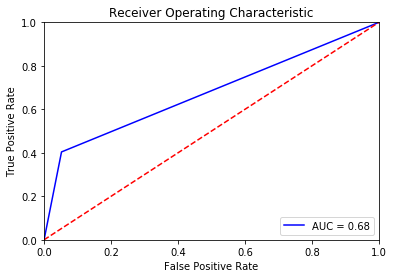

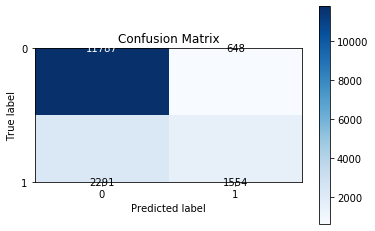

Accuracy (acc):  [0.81947174 0.81947174]
Sensitivity (sens/recall):  [0.94788902 0.40416125]
Specificity (spec):  [0.40416125 0.94788902]
Precision (prec):  [0.83726382 0.70572207]
Negative Predictive Value (npv):  [0.70572207 0.83726382]
F1-Score (F1):  [0.88914872 0.51397387]
AUROC Score:  0.6760251356468461


In [33]:
# Neural Network Classification Model
NN = MLPClassifier(solver='lbfgs', random_state=4906, learning_rate='adaptive')
NN.fit(audataX_train_sel, encY_train)
#Predicting the Test Set
predict = NN.predict(audataX_test_sel)
fpr, tpr, threshold = metrics.roc_curve(encY_test, predict)
roc_auc = metrics.auc(fpr, tpr)

print("Neural Network")
# Plotting AUROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Initializing Confusion Matrix
Cn = np.empty([2,2])
for coln in range(2):
    for rown in range(2):
        Cn[rown,coln] = np.sum(np.logical_and(predict==coln, encY_test==rown))
#Confusion matrix calculations for model explanation         
fp = Cn.sum(axis=0) - np.diag(Cn)
fn = Cn.sum(axis=1) - np.diag(Cn)
tp = np.diag(Cn)
tn = Cn.sum() - (fp + fn+ tp)
    
skplt.metrics.plot_confusion_matrix(encY_test, predict)
np.sum(np.logical_and(predict == coln, encY_test==rown))
plt.show()

print("Accuracy (acc): ", accuracy(tp,fn,fp,tn))
print("Sensitivity (sens/recall): ", recall(tp,fp,fn,tn))
print("Specificity (spec): ", specificity(tp,fp,fn,tn))
print("Precision (prec): ", precision(tp,fp,fn,tn))
print("Negative Predictive Value (npv): ", NegPredVal(tp,fp,fn,tn))
print("F1-Score (F1): " ,f1_score(tp,fp,fn,tn))
print("AUROC Score: ",roc_auc)   

Random Forest


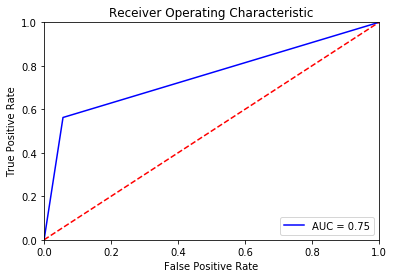

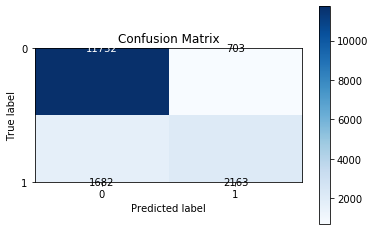

Accuracy (acc):  [0.85350123 0.85350123]
Sensitivity (sens/recall):  [0.94346602 0.56254876]
Specificity (spec):  [0.56254876 0.94346602]
Precision (prec):  [0.87460862 0.7547104 ]
Negative Predictive Value (npv):  [0.7547104  0.87460862]
F1-Score (F1): [0.90773337 0.64461332]
AUROC Score:  0.7530073939753297


In [34]:
# Random Forest Classification Model
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=4906)
RF.fit(audataX_train_sel, encY_train)
RF.predict(audataX_test_sel)
predict = RF.predict(audataX_test_sel)
fpr, tpr, threshold = metrics.roc_curve(encY_test, predict)
roc_auc = metrics.auc(fpr, tpr)

print("Random Forest")
# Plotting AUROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Initializing Confusion Matrix
Cr = np.empty([2,2])
for colr in range(2):
    for rowr in range(2):
        Cr[rowr,colr] = np.sum(np.logical_and(predict==colr, encY_test==rowr))
#Confusion matrix calculations for model explanation         
fp = Cr.sum(axis=0) - np.diag(Cr)
fn = Cr.sum(axis=1) - np.diag(Cr)
tp = np.diag(Cr)
tn = Cr.sum() - (fp + fn+ tp)
    
skplt.metrics.plot_confusion_matrix(encY_test, predict)
np.sum(np.logical_and(predict == colr, encY_test==rowr))
plt.show()

print("Accuracy (acc): ", accuracy(tp,fn,fp,tn))
print("Sensitivity (sens/recall): ", recall(tp,fp,fn,tn))
print("Specificity (spec): ", specificity(tp,fp,fn,tn))
print("Precision (prec): ", precision(tp,fp,fn,tn))
print("Negative Predictive Value (npv): ", NegPredVal(tp,fp,fn,tn))
print("F1-Score (F1):" ,f1_score(tp,fp,fn,tn))
print("AUROC Score: ",roc_auc)

Logistic


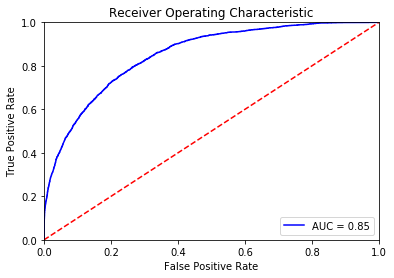

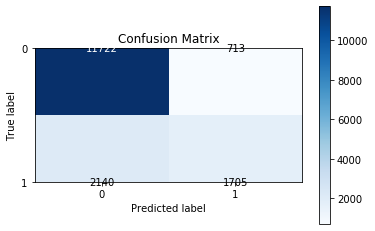

Accuracy (acc):  [0.8247543 0.8247543]
Sensitivity (sens/recall):  [0.94266184 0.44343303]
Specificity (spec):  [0.44343303 0.94266184]
Precision (prec):  [0.84562112 0.70512821]
Negative Predictive Value (npv):  [0.70512821 0.84562112]
F1-Score (F1): [0.89150854 0.54446751]
AUROC Score:  0.851323914263141


In [40]:
# logistic Regression Classification Model
model = LogisticRegression(solver='lbfgs',random_state=4906,max_iter=10000)
model.fit(audataX_train_sel, encY_train)
predict = model.predict(audataX_test_sel)

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(audataX_test_sel)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(encY_test, preds)
roc_auc = metrics.auc(fpr, tpr)

print("Logistic")
# Plotting AUROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
    

    
# Initializing Confusion Matrix
Cl = np.empty([2,2])
for coll in range(2):
    for rowl in range(2):
        Cl[rowl,coll] = np.sum(np.logical_and(predict==coll, encY_test==rowl))
#Confusion matrix calculations for model explanation         
fp = Cl.sum(axis=0) - np.diag(Cl)
fn = Cl.sum(axis=1) - np.diag(Cl)
tp = np.diag(Cl)
tn = Cl.sum() - (fp + fn+ tp)
    
skplt.metrics.plot_confusion_matrix(encY_test, predict)
np.sum(np.logical_and(predict == coll, encY_test==rowl))
plt.show()

print("Accuracy (acc): ", accuracy(tp,fn,fp,tn))
print("Sensitivity (sens/recall): ", recall(tp,fp,fn,tn))
print("Specificity (spec): ", specificity(tp,fp,fn,tn))
print("Precision (prec): ", precision(tp,fp,fn,tn))
print("Negative Predictive Value (npv): ", NegPredVal(tp,fp,fn,tn))
print("F1-Score (F1):" ,f1_score(tp,fp,fn,tn))
print("AUROC Score: ",roc_auc)

#### Other Classification Models
<table>
    <thead>
        <tr>
            <th>Model</th>
            <th>Accuracy</th>
            <th>Sensitivity</th>
            <th>Specificity</th>
            <th>Precision</th>
            <th>Neg-Pred Value</th>
            <th>F1 Score</th>
            <th>AUROC Score</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><em>Logistic</em></td>
            <td>0.8248</td>
            <td>0.9427</td>
            <td>0.4434</td>
            <td>0.8456</td>
            <td>0.7051</td>
            <td>0.8916</td>
            <td style="background:yellow;color:black"><strong>0.8513</strong></td>
        </tr>
        <tr>
            <td><em>Random Forest</em></td>
            <td style="background:yellow;color:black"><strong>0.8535</strong></td>
            <td>0.9435</td>
            <td style="background:yellow;color:black"><strong>0.5625</strong></td>
            <td style="background:yellow;color:black"><strong>0.8746</strong></td>
            <td>0.7547</td>
            <td style="background:yellow;color:black"><strong>0.9077</strong></td>
            <td>0.7530</td>  
        </tr>
        <tr>
            <td><em>Neural Network</em></td>
            <td>0.8195</td>
            <td>0.9479</td>
            <td>0.4042</td>
            <td>0.8373</td>
            <td>0.7057</td>
            <td>0.8891</td>
            <td>0.6760</td>
        </tr>
        <tr>
            <td><em>Support Vector Machine</em></td>
            <td>0.8435</td>
            <td style="background:yellow;color:black"><strong>0.9499</strong></td>
            <td>0.4994</td>
            <td>0.8599</td>
            <td style="background:yellow;color:black"><strong>0.7550</strong></td>
            <td>0.9026</td>
            <td>0.7246</td>
        </tr>
    </tbody>            
</table>

## Part 4 - Conclusions
#### KNN Classification Models
<table>
    <thead>
        <tr>
            <th>Model</th>
            <th>Accuracy</th>
            <th>Sensitivity</th>
            <th>Specificity</th>
            <th>Precision</th>
            <th>Neg-Pred Value</th>
            <th>F1 Score</th>
            <th>AUROC Score</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><em>KNN: 3</em></td>
            <td>0.8237</td>
            <td>0.8968</td>
            <td style="background:yellow;color:black"><strong>0.5875</strong></td>
            <td style="background:yellow;color:black"><strong>0.8755</strong></td>
            <td>0.6378</td>
            <td>0.8860</td>
            <td>0.8202</td>
        </tr>
        <tr>
            <td><em>KNN: 4</em></td>
            <td>0.8283</td>
            <td style="background:yellow;color:black"><strong>0.9382</strong></td>
            <td>0.4731</td>
            <td>0.8520</td>
            <td>0.7029</td>
            <td>0.8930</td>
            <td>0.8377</td>
        </tr>        
        <tr>
            <td><em>KNN: 5</em></td>
            <td>0.8297</td>
            <td>0.9069</td>
            <td>0.5797</td>
            <td>0.8747</td>
            <td>0.6583</td>
            <td>0.8905</td>
            <td>0.8515</td>
        </tr>
        <tr>
            <td><em>KNN: 6</em></td>
            <td>0.8330</td>
            <td>0.9371</td>
            <td>0.4965</td>
            <td>0.8575</td>
            <td>0.7094</td>
            <td>0.8956</td>
            <td>0.8591</td>
        </tr>
         <tr>
            <td><em>KNN: 7</em></td>
            <td>0.8311</td>
            <td>0.9111</td>
            <td>0.5722</td>
            <td>0.8732</td>
            <td>0.6657</td>
            <td>0.8918</td>
            <td>0.8647</td>
        </tr>
        <tr>
            <td><em>KNN: 8</em></td>
            <td>0.8337</td>
            <td>0.9346</td>
            <td>0.5072</td>
            <td>0.8598</td>
            <td>0.7058</td>
            <td>0.8957</td>
            <td>0.8685</td>
        </tr>
        <tr>
            <td><em>KNN: 9</em></td>
            <td>0.8348</td>
            <td>0.9168</td>
            <td>0.5696</td>
            <td>0.8732</td>
            <td>0.6793</td>
            <td>0.8945</td>
            <td>0.8708</td>
        </tr>
        <tr>
            <td><em>KNN: 10</em></td>
            <td>0.8373</td>
            <td>0.9353</td>
            <td>0.5204</td>
            <td>0.8631</td>
            <td style="background:yellow;color:black"><strong>0.7131</strong></td>
            <td>0.8978</td>
            <td>0.8747</td>
        </tr>
        <tr>
            <td><em>KNN: 11</em></td>
            <td>0.8372</td>
            <td>0.9192</td>
            <td>0.5722</td>
            <td>0.8742</td>
            <td>0.6864</td>
            <td>0.8961</td>
            <td>0.8766</td>
        </tr>
        <tr>
            <td><em>KNN: 12</em></td>
            <td>0.8375</td>
            <td>0.9341</td>
            <td>0.5251</td>
            <td>0.8642</td>
            <td>0.7114</td>
            <td>0.8978</td>
            <td>0.8784</td>
        </tr>
        <tr>
            <td><em>KNN: 13</em></td>
            <td>0.8386</td>
            <td>0.9195</td>
            <td>0.5771</td>
            <td style="background:yellow;color:black"><strong>0.8755</strong></td>
            <td>0.6891</td>
            <td>0.8970</td>
            <td>0.8801</td>
        </tr>
        <tr>
            <td><em>KNN: 14</em></td>
            <td>0.8386</td>
            <td>0.9329</td>
            <td>0.5337</td>
            <td>0.8661</td>
            <td>0.7108</td>
            <td style="background:yellow;color:black"><strong>0.8982</strong></td>
            <td>0.8816</td>
        </tr>
        <tr>
            <td><em>KNN: 15</em></td>
            <td style="background:yellow;color:black"><strong>0.8390</strong></td>
            <td>0.9217</td>
            <td>0.5717</td>
            <td>0.8744</td>
            <td>0.6929</td>
            <td>0.8974</td>
            <td style="background:yellow;color:black"><strong>0.8825</strong></td>
        </tr>
    </tbody>            
</table>

Accuracy shows how often the model in question correctly predicted the class for each record. The KNN model using 15 neighbors has the highest accuracy.

Sensitivity illustrates the proportion of people who make more than $50K in a year, and were classified by the model as such. The KNN model using 4 neighbors has the highest sensitivity.

Specificity illustrates the proportion of people who make less than $50K in a year, and were classified by the model as such. The KNN model using 3 neighbors has the highest specificity. 

Precision quantifies the number of correct positive predictions, and the accuracy for the minority group. In this case how accurate the model predicts people make more than $50K in a year. The KNN Models using 3 neighbors and 13 neihhbors are tied for the highest precision.

The Negative Predictive Value explains how accurate a negative result is. In this case it's how accurate the model predicts people make less than $50k in a year. The KNN Model using 10 neighbors has the highest Negative Pretictive Value.

The data is skewed in favor of one category, most people in thd data set make less than  $50K in a given year. The F1 Score is a useful metric for unbalanced classification, as it balances precision and recall. The KNN Model using 14 neighbors has the highest F1 Score.

The ROC curve is a probability curve relating the True Positive Rate and the False Positive rate for a model. The AUC or area under the curve shows the measure of separability between classes. The KNN model using 15 neighbors has the higest AUROC score.

The Logistic Regression Classification model has the highest area under the ROC curve.

Random Forest scores highest in Accuracy, Specificity, Precision, and F1 Score. 

Support Vector Machine has the highest Sensitivity and Negative Predictive Value.

#### Overall Best Model
<table>
    <thead>
        <tr>
            <th>Model</th>
            <th>Accuracy</th>
            <th>Sensitivity</th>
            <th>Specificity</th>
            <th>Precision</th>
            <th>Neg-Pred Value</th>
            <th>F1 Score</th>
            <th>AUROC Score</th>
        </tr>
    </thead>
    <tbody>
         <tr>
            <td><em>Logistic</em></td>
            <td>0.8248</td>
            <td>0.9427</td>
            <td>0.4434</td>
            <td>0.8456</td>
            <td>0.7051</td>
            <td>0.8916</td>
             <td>0.8513</td>
        </tr>
        <tr>
            <td><em>Random Forest</em></td>
            <td style="background:orange;color:black"><strong>0.8535</strong></td>
            <td style="background:yellow;color:black"><strong>0.9435</strong></td>
            <td style="background:yellow;color:black"><strong>0.5625</strong></td>
            <td style="background:yellow;color:black"><strong>0.8746</strong></td>
            <td style="background:yellow;color:black"><strong>0.7547</strong></td>
            <td style="background:orange;color:black"><strong>0.9077</strong></td>
            <td>0.7530</td>  
        </tr>
        <tr>
            <td><em>Support Vector Machine</em></td>
            <td>0.8435</td>
            <td style="background:yellow;color:black"><strong>0.9499</strong></td>
            <td>0.4994</td>
            <td>0.8599</td>
            <td style="background:yellow;color:black"><strong>0.7550</strong></td>
            <td>0.9026</td>
            <td>0.7246</td>
        </tr>
        <tr>
            <td><em>KNN: 3</em></td>
            <td>0.8237</td>
            <td>0.8968</td>
            <td style="background:yellow;color:black"><strong>0.5875</strong></td>
            <td style="background:yellow;color:black"><strong>0.8755</strong></td>
            <td>0.6378</td>
            <td>0.8860</td>
            <td>0.8202</td>
        </tr>
        <tr>
            <td><em>KNN: 4</em></td>
            <td>0.8283</td>
            <td>0.9382</td>
            <td>0.4731</td>
            <td>0.8520</td>
            <td>0.7029</td>
            <td>0.8930</td>
            <td>0.8377</td>
        </tr>        
        <tr>
            <td><em>KNN: 10</em></td>
            <td>0.8373</td>
            <td>0.9353</td>
            <td>0.5204</td>
            <td>0.8631</td>
            <td>0.7131</td>
            <td>0.8978</td>
            <td>0.8747</td>
        </tr>
        <tr>
            <td><em>KNN: 13</em></td>
            <td>0.8386</td>
            <td>0.9195</td>
            <td>0.5771</td>
            <td style="background:yellow;color:black"><strong>0.8755</strong></td>
            <td>0.6891</td>
            <td>0.8970</td>
            <td>0.8801</td>
        </tr>
        <tr>
            <td><em>KNN: 14</em></td>
            <td>0.8386</td>
            <td>0.9329</td>
            <td>0.5337</td>
            <td>0.8661</td>
            <td>0.7108</td>
            <td style="background:yellow;color:black"><strong>0.8982</strong></td>
            <td>0.8816</td>
        </tr>
        <tr>
            <td><em>KNN: 15</em></td>
            <td style="background:yellow;color:black"><strong>0.8390</strong></td>
            <td>0.9217</td>
            <td>0.5717</td>
            <td>0.8744</td>
            <td>0.6929</td>
            <td>0.8974</td>
            <td style="background:yellow;color:black"><strong>0.8825</strong></td>
        </tr>
    </tbody>            
</table>

Given that most people in the data make less than 50K in a year, a high F1 Score is important. The model preditcs if a person makes more than 50K in a year, in this instance the negative predition is that they make less than 50K in a year. Therefore, a higher NPV is important. High accuracy and precision scores are also important. The Random Forest Classification model has the highest F1 and accuracy scores, and the second highest NPV. the RF model also does well in all other metrics apart from the AUROC score.